In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Classified Data',index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler= StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_features= scaler.transform(df.drop('TARGET CLASS',axis=1))

In [11]:
df_sf=  pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [12]:
df_sf.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df_sf
y=df['TARGET CLASS']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn=KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [19]:
pred=knn.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



array([[134,   8],
       [ 11, 147]], dtype=int64)

In [22]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [26]:
error_rate

[0.06333333333333334,
 0.08333333333333333,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05333333333333334,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05333333333333334,
 0.06,
 0.056666666666666664,
 0.05333333333333334,
 0.05333333333333334,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05]

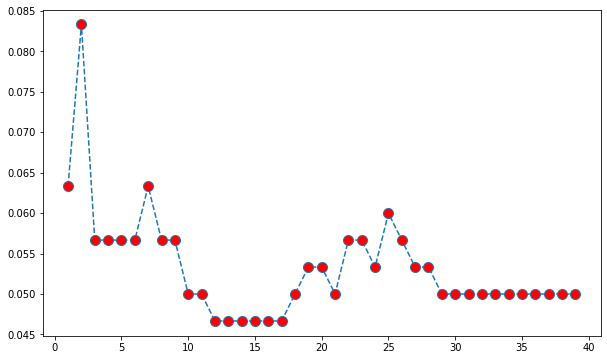

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,marker='o',linestyle='dashed',markerfacecolor='red',markersize=10)

In [33]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [34]:
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       142
           1       0.96      0.95      0.96       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



array([[136,   6],
       [  8, 150]], dtype=int64)